In [1]:
# Data manipulation
import pandas as pd # for data manipulation
import numpy as np # for data manipulation

# Visualization
import plotly.express as px # for data visualization

# Skleran
from sklearn.datasets import make_swiss_roll # for creating swiss roll
from sklearn.manifold import LocallyLinearEmbedding as LLE # for LLE dimensionality reduction
from sklearn.manifold import Isomap # for Isomap dimensionality reduction

In [2]:
# Create a swiss roll
X, y = make_swiss_roll(n_samples=2000, noise=0.05)

In [3]:
X.shape

(2000, 3)

In [4]:
y.shape

(2000,)

In [5]:
y

array([ 5.05869188,  7.3009962 , 11.41294911, ..., 12.35265436,
        5.63731004,  8.3901184 ])

In [6]:
# Create a 3D scatter plot
def Plot3D(X, y, plot_name):
    fig = px.scatter_3d(None, 
                        x=X[:,0], y=X[:,1], z=X[:,2],
                        color=y,
                        height=800, width=800
                       )
    # Update chart looks
    fig.update_layout(title_text=plot_name,
                      showlegend=False,
                      legend=dict(orientation="h", yanchor="top", y=0, xanchor="center", x=0.5),
                      scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                            center=dict(x=0, y=0, z=-0.1),
                                            eye=dict(x=1.5, y=1.75, z=1)),
                                            margin=dict(l=0, r=0, b=0, t=0),
                      scene = dict(xaxis=dict(backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0',
                                              title_font=dict(size=10),
                                              tickfont=dict(size=10),
                                             ),
                                   yaxis=dict(backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0',
                                              title_font=dict(size=10),
                                              tickfont=dict(size=10),
                                              ),
                                   zaxis=dict(backgroundcolor='lightgrey',
                                              color='black', 
                                              gridcolor='#f0f0f0',
                                              title_font=dict(size=10),
                                              tickfont=dict(size=10),
                                             )))
    # Update marker size
    fig.update_traces(marker=dict(size=3, 
                                  line=dict(color='black', width=0.1)))
    fig.update(layout_coloraxis_showscale=False)
    return fig

In [7]:
Plot3D(X, y, 'Regular Swiss Roll')

In [8]:
# Create a flat addon to the top of the swiss roll
X_x=np.zeros((300,1))
X_y=np.random.uniform(low=0, high=10, size=(300,1))
X_z=np.random.uniform(low=14, high=25, size=(300,1))
X2=np.concatenate((X_x, X_y, X_z), axis=1)
y2=X_z.reshape(300)

# Concatenate swiss roll and flat rectangle arrays
X_two=np.concatenate((X, X2))
y_two=np.concatenate((y, y2))

In [9]:
Plot3D(X_two, y_two, 'Modified Swiss Roll')

In [10]:
# Function for performing LLE and MLLE
def run_lle(num_neighbors, dims, mthd, data):
    # Specify LLE parameters
    embed_lle = LLE(n_neighbors=num_neighbors, # default=5, number of neighbors to consider for each point.
                    n_components=dims, # default=2, number of dimensions of the new space 
                    reg=0.001, # default=1e-3, regularization constant, multiplies the trace of the local covariance matrix of the distances.
                    eigen_solver='auto', # {‘auto’, ‘arpack’, ‘dense’}, default=’auto’, auto : algorithm will attempt to choose the best method for input data
                    #tol=1e-06, # default=1e-6, Tolerance for ‘arpack’ method. Not used if eigen_solver==’dense’.
                    #max_iter=100, # default=100, maximum number of iterations for the arpack solver. Not used if eigen_solver==’dense’.
                    method=mthd, # {‘standard’, ‘hessian’, ‘modified’, ‘ltsa’}, default=’standard’
                    #hessian_tol=0.0001, # default=1e-4, Tolerance for Hessian eigenmapping method. Only used if method == 'hessian'
                    modified_tol=1e-12, # default=1e-12, Tolerance for modified LLE method. Only used if method == 'modified'
                    neighbors_algorithm='auto', # {‘auto’, ‘brute’, ‘kd_tree’, ‘ball_tree’}, default=’auto’, algorithm to use for nearest neighbors search, passed to neighbors.NearestNeighbors instance
                    random_state=42, # default=None, Determines the random number generator when eigen_solver == ‘arpack’. Pass an int for reproducible results across multiple function calls.
                    n_jobs=-1 # default=None, The number of parallel jobs to run. -1 means using all processors.
                   )
    # Fit and transofrm the data
    result = embed_lle.fit_transform(data)
    
    # Return results
    return result

In [11]:
# Function for performing Isomap
def run_isomap(num_neighbors, dims, data):
    # Specify Isomap parameters
    embed_isomap = Isomap(n_neighbors=num_neighbors, n_components=dims, n_jobs=-1)
    
    # Fit and transofrm the data
    result = embed_isomap.fit_transform(data)
    
    # Return results
    return result

We can now call the above functions to perform dimensionality reduction.

Let’s create five 2D embeddings using different data and algorithms. Note that in all cases, we set the number of neighbors to 30 while using default values for other hyperparameters. Our five embeddings will be:

Standard LLE on a regular swiss roll
Modified LLE on a regular swiss roll
Isomap on a regular swiss roll
Modified LLE on a modified swiss roll
Isomap on a modified swiss roll

In [12]:
######### Regular swiss roll #########

# Standard LLE on a regular swiss roll
std_lle_res=run_lle(num_neighbors=30, dims=2, mthd='standard', data=X)

# Modified LLE on a regular swiss roll
mlle_res=run_lle(num_neighbors=30, dims=2, mthd='modified', data=X)

# Isomap on a regular swiss roll
isomap_res=run_isomap(num_neighbors=30, dims=2, data=X)

In [13]:
######### Modified swiss roll #########

# Modified LLE on a modified swiss roll
mod_mlle_res=run_lle(num_neighbors=30, dims=2, mthd='modified', data=X_two)

# Isomap on a modified swiss roll
mod_isomap_res=run_isomap(num_neighbors=30, dims=2, data=X_two)

In [14]:
# Create a 2D scatter plot
def Plot2D(X, y, plot_name):
    # Create a scatter plot
    fig = px.scatter(None, x=X[:,0], y=X[:,1], 
                     labels={
                         "x": "Dimension 1",
                         "y": "Dimension 2",
                     },
                     opacity=1, color=y)

    # Change chart background color
    fig.update_layout(dict(plot_bgcolor = 'white'))

    # Update axes lines
    fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                     zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                     showline=True, linewidth=1, linecolor='black')

    fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                     zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                     showline=True, linewidth=1, linecolor='black')

    # Set figure title
    fig.update_layout(title_text=plot_name)

    # Update marker size
    fig.update_traces(marker=dict(size=5,
                                 line=dict(color='black', width=0.3)))
    return fig

In [15]:
Plot2D(std_lle_res, y, 'Regular Swiss Roll - LLE')

In [16]:
Plot2D(mlle_res, y, 'Regular Swiss Roll - MLLE')

In [17]:
Plot2D(isomap_res, y, 'Regular Swiss Roll - Isomap')

# In general, out of the three algorithms, MLLE seems to have the least distorted 2D embedding.In both cases. 

In [18]:
Plot2D(mod_mlle_res, y_two, 'Modified Swiss Roll - MLLE')

In [19]:
Plot2D(mod_isomap_res, y_two, 'Modified Swiss Roll - Isomap')

In [25]:
from sklearn.datasets import load_digits #mnist
from sklearn.manifold import Isomap
X, y = load_digits(return_X_y=True) #load data

In [26]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [27]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [28]:
unique, counts = np.unique(X, return_counts=True)

In [29]:
unique

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16.])

In [30]:
counts

array([56272,  4095,  3296,  2944,  3261,  2803,  2559,  2627,  3464,
        2585,  2711,  2845,  3668,  3509,  3609,  4304, 10456],
      dtype=int64)

In [31]:
unique, counts = np.unique(y, return_counts=True)

In [32]:
unique

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [33]:
counts

array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180], dtype=int64)

In [34]:
import pandas as pd
import numpy as np 
import os
import fnmatch
import matplotlib.pyplot as plt
from sklearn.manifold import LocallyLinearEmbedding as LLE
from sklearn.decomposition import PCA, KernelPCA
import random
from mpl_toolkits.mplot3d import Axes3D

In [36]:
FIGURESIZE = (10,8)
FONTSIZE = 24
plt.rcParams['figure.figsize'] = FIGURESIZE
plt.rcParams['font.size'] = FONTSIZE
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18

In [37]:
t = np.arange(0,10,0.01)
x0 = np.cos(t) * (t+1)
x1 = np.sin(t) * (t+1)
x2 = [20* random.random() for x in x0]

x0 = np.array([x0])
x1 = np.array([x1])
x2 = np.array([x2])

x = np.concatenate([x0,x1,x2],axis=0).T

In [38]:
x.shape

(1000, 3)

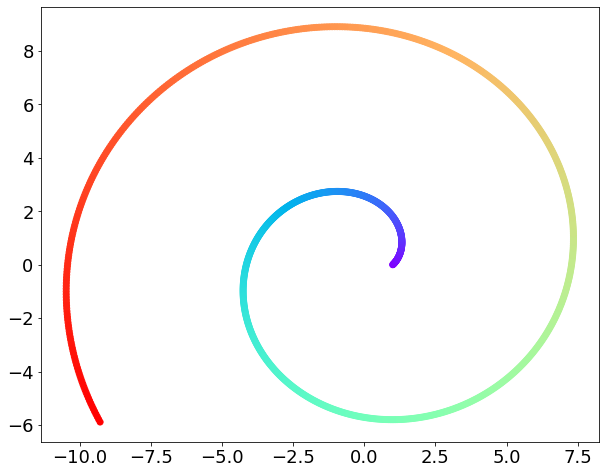

In [39]:
fig = plt.figure(figsize=FIGURESIZE)
ax = fig.add_subplot(111)
ax.scatter(x[:,0],x[:,1],c=t,cmap=plt.cm.rainbow)

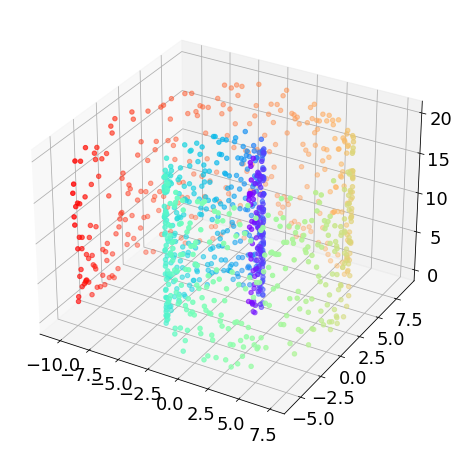

In [41]:
fig = plt.figure(figsize=FIGURESIZE)
ax = fig.add_subplot(111,projection='3d')
ax.scatter(x[:,0],x[:,1],x[:,2],c=t,cmap=plt.cm.rainbow)

In [42]:
#we have more densitu when t=0. Points are getting wider distance once t is increasing. 

come back a unroll that carpet into a 2d point using LLE. 

In [47]:
#Create LLE model: 
embed_lle = LLE(n_neighbors=20, # default=5, number of neighbors to consider for each point.
                    n_components=2, # default=2, number of dimensions of the new space 
                    reg=0.001, # default=1e-3, regularization constant, multiplies the trace of the local covariance matrix of the distances.
                    eigen_solver='dense', # {‘auto’, ‘arpack’, ‘dense’}, default=’auto’, auto : algorithm will attempt to choose the best method for input data
                    #tol=1e-06, # default=1e-6, Tolerance for ‘arpack’ method. Not used if eigen_solver==’dense’.
                    #max_iter=100, # default=100, maximum number of iterations for the arpack solver. Not used if eigen_solver==’dense’.
                    method='standard', # {‘standard’, ‘hessian’, ‘modified’, ‘ltsa’}, default=’standard’
                    #hessian_tol=0.0001, # default=1e-4, Tolerance for Hessian eigenmapping method. Only used if method == 'hessian'
                    modified_tol=1e-12, # default=1e-12, Tolerance for modified LLE method. Only used if method == 'modified'
                    neighbors_algorithm='auto', # {‘auto’, ‘brute’, ‘kd_tree’, ‘ball_tree’}, default=’auto’, algorithm to use for nearest neighbors search, passed to neighbors.NearestNeighbors instance
                    random_state=42, # default=None, Determines the random number generator when eigen_solver == ‘arpack’. Pass an int for reproducible results across multiple function calls.
                    n_jobs=-1 # default=None, The number of parallel jobs to run. -1 means using all processors.
               )

In [52]:
y = embed_lle.fit_transform(x)

In [53]:
y.shape

(1000, 2)

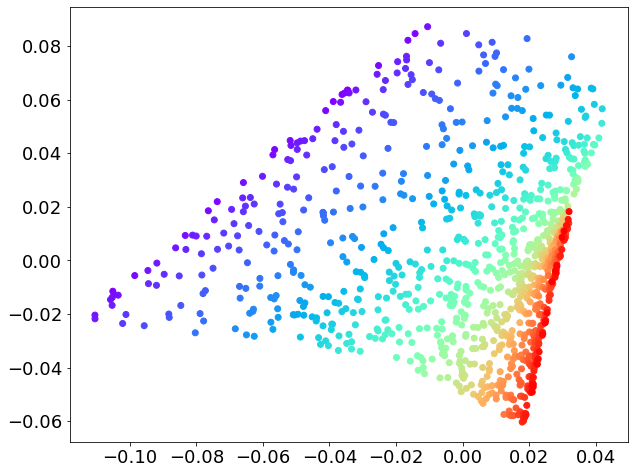

In [54]:
fig = plt.figure(figsize=FIGURESIZE)
ax = fig.add_subplot(111)
ax.scatter(y[:,0],y[:,1],c=t,cmap=plt.cm.rainbow)

at the red color bottom colors are getting closer beacuase to find n closest 20 neighbours the algorithm needs to find in a wider area. 

In [20]:
df = pd.read_csv('C:/Users/Admin/Machine Learning chapter 5/Fish.csv')

In [21]:
df

Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]

In [22]:
df['Height'].max()

18.957

In [23]:
df['Height'].min()

1.7284

In [24]:
df['sex'] = np.where(df['Height']>10, 'Male', 'Female')

In [25]:
df.head(10)

Species  Weight  Length1  Length2  Length3   Height   Width   sex
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200  Male
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056  Male
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961  Male
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555  Male
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340  Male
5   Bream   450.0     26.8     29.7     34.7  13.6024  4.9274  Male
6   Bream   500.0     26.8     29.7     34.5  14.1795  5.2785  Male
7   Bream   390.0     27.6     30.0     35.0  12.6700  4.6900  Male
8   Bream   450.0     27.6     30.0     35.1  14.0049  4.8438  Male
9   Bream   500.0     28.5     30.7     36.2  14.2266  4.9594  Male

In [26]:
df['sex'].value_counts()

Female    97
Male      62
Name: sex, dtype: int64

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
data_columns = ['Weight','Length1','Length2','Length3','Height','Width']

In [29]:
#scaling the data from 0 to 1. 
std_scaler = StandardScaler()
df[data_columns] = std_scaler.fit_transform(df[data_columns])

In [30]:
df

Species    Weight   Length1   Length2   Length3    Height     Width  \
0     Bream -0.438072 -0.305789 -0.282303 -0.106020  0.596579 -0.236529   
1     Bream -0.303562 -0.225507 -0.198054 -0.002337  0.821261 -0.066579   
2     Bream -0.163448 -0.235542 -0.179332 -0.010977  0.797341  0.165793   
3     Bream -0.098995  0.005302  0.054694  0.196390  0.879771  0.022621   
4     Bream  0.088759  0.025372  0.054694  0.239592  0.812835  0.426371   
..      ...       ...       ...       ...       ...       ...       ...   
154   Smelt -1.082039 -1.479903 -1.517960 -1.540309 -1.610359 -1.799403   
155   Smelt -1.078676 -1.459833 -1.499238 -1.531669 -1.530878 -1.873547   
156   Smelt -1.082039 -1.419692 -1.443072 -1.505748 -1.566687 -1.881402   
157   Smelt -1.061022 -1.309305 -1.321378 -1.384784 -1.427243 -1.398568   
158   Smelt -1.060461 -1.249094 -1.255851 -1.298381 -1.413341 -1.510440   

        sex  
0      Male  
1      Male  
2      Male  
3      Male  
4      Male  
..      ...  
154  Female  
155  Female  
156  Female  
157  Female  
158  Female  

[159 rows x 8 columns]

LLE with 3 dimensions

In [31]:
LLE = LLE(n_components=3,n_neighbors=15)
df_LLE  = LLE.fit_transform(df[data_columns])

In [32]:
df_LLE

array([[-1.01951366e-02,  8.25284511e-02,  8.21219603e-02],
       [-2.42239851e-02,  9.92736867e-02,  7.75300154e-02],
       [-2.34664146e-02,  8.38650475e-02,  2.43722908e-02],
       [-3.70598734e-02,  8.84371222e-02,  8.08986005e-02],
       [-3.55640523e-02,  5.89818199e-02, -1.80430772e-04],
       [-4.94778628e-02,  9.03563363e-02,  4.53367455e-02],
       [-5.42268742e-02,  8.98562741e-02,  9.08075198e-03],
       [-4.11452796e-02,  7.39141318e-02,  6.67809150e-02],
       [-5.48755959e-02,  9.92426438e-02,  6.66783463e-02],
       [-6.25586236e-02,  9.86661550e-02,  6.50125351e-02],
       [-5.90861341e-02,  8.90657681e-02,  4.75950390e-02],
       [-6.53282653e-02,  1.06768702e-01,  8.49362972e-02],
       [-6.68220619e-02,  1.14961444e-01,  1.35754666e-01],
       [-4.81940485e-02,  6.32445356e-02,  5.77012428e-02],
       [-7.83164190e-02,  1.09152965e-01,  6.10320923e-02],
       [-7.71182366e-02,  9.73354209e-02,  1.58962048e-02],
       [-9.01194170e-02,  1.10790781e-01

In [33]:
print('Reconstruction error:',LLE.reconstruction_error_)

Reconstruction error: 1.7543559751751573e-05


In [34]:
df_LLE[:,0]

array([-0.01019514, -0.02422399, -0.02346641, -0.03705987, -0.03556405,
       -0.04947786, -0.05422687, -0.04114528, -0.0548756 , -0.06255862,
       -0.05908613, -0.06532827, -0.06682206, -0.04819405, -0.07831642,
       -0.07711824, -0.09011942, -0.09157841, -0.08826013, -0.07999017,
       -0.07924357, -0.09755567, -0.08988491, -0.08883595, -0.10109794,
       -0.10019191, -0.09931579, -0.10444703, -0.11806886, -0.14621308,
       -0.1377637 , -0.14122848, -0.14484897, -0.15114047, -0.14275269,
        0.10179365,  0.07732202,  0.07198895,  0.06775762,  0.06256211,
        0.06256718,  0.06056354,  0.05931749,  0.05502251,  0.05221009,
        0.04677316,  0.05093046,  0.04995192,  0.03781819,  0.04316964,
        0.03706171,  0.03559249,  0.01180638,  0.00966072, -0.01294166,
        0.02010176,  0.02038013,  0.0063822 , -0.02884601, -0.07232354,
       -0.09976617,  0.07695141,  0.07591788,  0.05973942,  0.04505702,
        0.03651283,  0.03792833,  0.02915907,  0.02370085,  0.01

In [35]:
df[['LLE1','LLE2','LLE3']] = df_LLE

In [36]:
df.LLE1

0     -0.010195
1     -0.024224
2     -0.023466
3     -0.037060
4     -0.035564
         ...   
154    0.131279
155    0.129726
156    0.130026
157    0.115379
158    0.115029
Name: LLE1, Length: 159, dtype: float64

In [38]:
import matplotlib.pyplot as plt

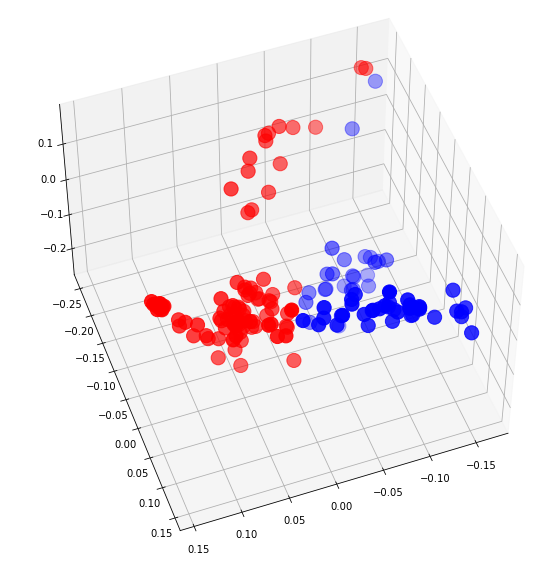

In [39]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
colors_fish = {'Male': 'b','Female':'r'}
ax.scatter3D(df.LLE1,df.LLE2,df.LLE3,c= df['sex'].apply(lambda x:colors_fish[x]),s=200)
ax.view_init(azim=70, elev=50)

In [40]:
import plotly.express as px

In [41]:
fig = px.scatter_3d(df,x='LLE1',y='LLE2',z='LLE3',color='sex')
fig.show()

In [42]:
fig = px.scatter_3d(df,x='LLE1',y='LLE2',z='LLE3',color='Species')
fig.show()